# Programming Exercise 1: Linear Regression
# Optional Exercises
# 3 Linear regression with multiple variables

In [1]:
import csv

xs = []
ys = []
with open('../matlab/ex1data2.txt') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        xs.append(map(float, row[:-1]))
        ys.append(float(row[-1]))
    m = len(ys)

print 'First 10 examples from the dataset:'
for x, y in zip(xs, ys)[:10]:
    print ' x = [%.0f, %.0f], y = %.0f' % (x[0], x[1], y)

First 10 examples from the dataset:
 x = [2104, 3], y = 399900
 x = [1600, 3], y = 329900
 x = [2400, 3], y = 369000
 x = [1416, 2], y = 232000
 x = [3000, 4], y = 539900
 x = [1985, 4], y = 299900
 x = [1534, 3], y = 314900
 x = [1427, 3], y = 198999
 x = [1380, 3], y = 212000
 x = [1494, 3], y = 242500


## 3.1 Feature Normalization

In [2]:
import numpy as np

def feature_normalize(X):
    m, n = X.shape
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)
    ### YOUR CODE HERE ###



    ######################
    return X_norm, mu, sigma

X = np.array(xs)
y = np.array([ys]).T
X_norm, mu, sigma = feature_normalize(X)
X = np.column_stack((np.ones((m, 1)), X_norm))
print X[:10,:]

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]
 [ 1.         -0.01994505  1.10220517]
 [ 1.         -0.59358852 -0.22609337]
 [ 1.         -0.72968575 -0.22609337]
 [ 1.         -0.78946678 -0.22609337]
 [ 1.         -0.64446599 -0.22609337]]


## 3.2 Gradient Descent
$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$

In [3]:
_, n = X.shape
theta = np.zeros((n, 1))
iterations = 100
alpha = 0.01

### Computing the cost $J(\theta)$

In [4]:
def compute_cost(X, y, theta):
    m, _ = y.shape
    J = 0
    ### YOUR CODE HERE ###


    ######################
    return J

print '%e' % compute_cost(X, y, theta)  # Should be 6.56 * 10^10

6.559155e+10


### Gradient descent

In [5]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m, _ = y.shape
    J_history = []
    for _ in range(num_iters):
        ### YOUR CODE HERE ###


        
        ######################
        J_history.append(compute_cost(X, y, theta))
    return theta, J_history

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print theta
print '%e' % J_history[-1]

[[ 215810.61679138]
 [  61446.18781361]
 [  20070.13313796]]
1.059697e+10


### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

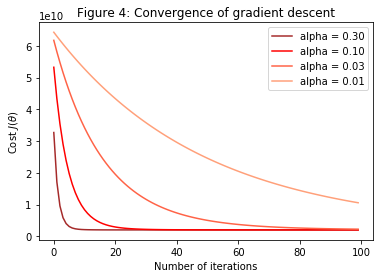

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline

alphas = (0.3, 0.1, 0.03, 0.01)
colors = ('brown', 'r', 'tomato', 'lightsalmon')
for alpha, color in zip(alphas, colors):
    theta = np.zeros((n, 1))
    _, J_history = gradient_descent(X, y, theta, alpha, iterations)
    plt.plot(J_history, color, label='alpha = %.2f' % alpha)
plt.title('Figure 4: Convergence of gradient descent')
plt.xlabel('Number of iterations')
plt.ylabel(r'Cost $J(\theta)$')
plt.legend(loc='upper right')